<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M5Sesi%C3%B3n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Módulo 5**
###**Sesión 2**

Separación, validación y evaluación para algoritmos de ML


**Ejemplo 1**

- Primero, generaremos un conjunto de blobs. Estos datos son "dummy" y nos ayudarán a entrenar casi cualquier sistema.

In [1]:
#Librerías
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


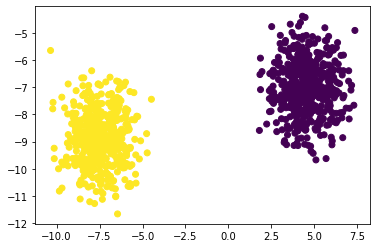

In [5]:
#Crear conjunto de blobs
#Crea mil números aleatorios, centers y n_features deben empatar (ser iguales)
x, y = make_blobs(n_samples=1000, centers=2, n_features=2)
#X matriz de dos por mil números aleatorios, Y vector de 1 y 0
plt.scatter(x[:,0], x[:,1], c=y) 
#[:,0] Todas las filas de columna 1, [:,1] Todas las filas de la columna 1
# c=y colorea por valor de Y
plt.show()

Partición
- Nota que "particionar" sólo será util si necesitas tres particiones (entrenamiento, validación y prueba). 
- Si no necesitas tres, mejor utiliza la función train_test_split.

In [ ]:
#Definir particiones
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    print(temp_size)
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]
#Partición en 60% entrenamiento, 10% validacion, 30% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.60,0.10,0.30)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

**Reto 1**
- En este reto hemos de particionar datos en tres grupos. 

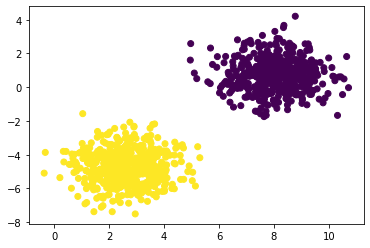

In [6]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [7]:
#Partición
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

In [8]:
#Particiona en 60% entrenamiento, 10% validacion, 30% prueba
#[....] = particionar(...)
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.60,0.10,0.30)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(600, 2)
(100, 2)
(300, 2)


In [9]:
#Particionando en 70% entrenamiento, 10% validacion, 20% prueba
#[...] = particionar(...)
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.70,0.10,0.20)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(699, 2)
(100, 2)
(201, 2)


**Ejemplo 2**

- En este ejemplo vamos a generar unos datos dummy con numpy, y vamos a separarlos de tal manera que puedas elegir en cuantas separaciones deseas con K-fold. 
- Es importante que veas como los datos son separados aleatoriamente y no se repiten en cada fold. Si la cantidad de folds no permiten bloques, algunos ciclos tendrán mas (o menos) datos.

Nota: Retira el random_seed para tener datos únicos en cada ocasión.

In [11]:
#Librería para validación cruzada
from sklearn.model_selection import KFold

In [12]:
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

K = 4 #Número de iteraciones
random_seed = 48  #Semilla para reproducir resultados
aleatorio = True  #Muestreo aleatorio

kfold = KFold(K, aleatorio, random_seed)  #Objeto instanceado que contiene parámetros
ciclo = 1
for indices_train, indices_test in kfold.split(data):
    print("Ciclo: "+str(ciclo))
    print("\t datos para entrenamiento:"+str(data[indices_train]))
    print("\t datos para prueba:"+str(data[indices_test]))
    ciclo+=1

Ciclo: 1
	 datos para entrenamiento:[ 1  2  3  4  5  6  7 11 12]
	 datos para prueba:[ 8  9 10]
Ciclo: 2
	 datos para entrenamiento:[ 1  2  4  5  8  9 10 11 12]
	 datos para prueba:[3 6 7]
Ciclo: 3
	 datos para entrenamiento:[ 1  2  3  4  6  7  8  9 10]
	 datos para prueba:[ 5 11 12]
Ciclo: 4
	 datos para entrenamiento:[ 3  5  6  7  8  9 10 11 12]
	 datos para prueba:[1 2 4]


**Reto 2**
- En este reto haremos K-fold de datos! si tienes un dataset para tu proyecto final, aprovecha para usarlo. En mi caso utilizaremos 1000 blobs.

Nota: Si vas a hacer K-fold y usarlo en la vida real, no uses un random_seed.

In [14]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=2)

#Agrega aquí la separación adecuada: 
#K=25
random_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(x):
    print("Ciclo: "+str(ciclo))
    
    print("Usare "+str(x[indices_train].shape)+" datos para entrenar (entrada)")
    print("Usare "+str(y[indices_train].shape)+" datos para entrenar (salida)")
    
    print("Usare "+str(x[indices_test].shape)+" datos para probar (entrada)")
    print("Usare "+str(y[indices_test].shape)+" datos para probar (salida)")    
    ciclo+=1

Ciclo: 1
Usare (750, 2) datos para entrenar (entrada)
Usare (750,) datos para entrenar (salida)
Usare (250, 2) datos para probar (entrada)
Usare (250,) datos para probar (salida)
Ciclo: 2
Usare (750, 2) datos para entrenar (entrada)
Usare (750,) datos para entrenar (salida)
Usare (250, 2) datos para probar (entrada)
Usare (250,) datos para probar (salida)
Ciclo: 3
Usare (750, 2) datos para entrenar (entrada)
Usare (750,) datos para entrenar (salida)
Usare (250, 2) datos para probar (entrada)
Usare (250,) datos para probar (salida)
Ciclo: 4
Usare (750, 2) datos para entrenar (entrada)
Usare (750,) datos para entrenar (salida)
Usare (250, 2) datos para probar (entrada)
Usare (250,) datos para probar (salida)


**Ejemplo 3**

- En este ejemplo vamos a generar unos datos dummy con numpy, y vamos a separarlos de tal manera que puedas elegir en cuantas separaciones deseas con K-fold. 
- Es importante que veas como los datos son separados aleatoriamente y no se repiten en cada fold. Si la cantidad de folds no permiten bloques, algunos ciclos tendrán mas (o menos) datos.

In [15]:
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

K = data.shape[0] # K = numero de muestras, longitud del array
random_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(data):
    print("Ciclo: "+str(ciclo))
    print("\t datos para entrenamiento:"+str(data[indices_train]))
    print("\t datos para prueba:"+str(data[indices_test]))
    ciclo+=1

Ciclo: 1
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  8  9 11 12]
	 datos para prueba:[10]
Ciclo: 2
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  8 10 11 12]
	 datos para prueba:[9]
Ciclo: 3
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  9 10 11 12]
	 datos para prueba:[8]
Ciclo: 4
	 datos para entrenamiento:[ 1  2  3  4  5  7  8  9 10 11 12]
	 datos para prueba:[6]
Ciclo: 5
	 datos para entrenamiento:[ 1  2  4  5  6  7  8  9 10 11 12]
	 datos para prueba:[3]
Ciclo: 6
	 datos para entrenamiento:[ 1  2  3  4  5  6  8  9 10 11 12]
	 datos para prueba:[7]
Ciclo: 7
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  8  9 10 11]
	 datos para prueba:[12]
Ciclo: 8
	 datos para entrenamiento:[ 1  2  3  4  5  6  7  8  9 10 12]
	 datos para prueba:[11]
Ciclo: 9
	 datos para entrenamiento:[ 1  2  3  4  6  7  8  9 10 11 12]
	 datos para prueba:[5]
Ciclo: 10
	 datos para entrenamiento:[ 1  3  4  5  6  7  8  9 10 11 12]
	 datos para prueba:[2]
Ciclo: 11
	 datos para entrenamiento:[ 1  2  3

**Reto 3**
- En este reto vamos a generar un Leave-one-out cross validation (LOOCV), y para ello necesitarás un dataset. Para efectos de este reto, yo usare 1000 blobs, lo que llevará 1000 ciclos.

In [ ]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=2)

#Agrega aquí la separación correcta: 
K= y.shape[0]
random_seed = 48
aleatorio = True

kfold = KFold(K, aleatorio, random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(x):
    print("Ciclo: "+str(ciclo))
    
    print("Usare "+str(x[indices_train].shape)+" datos para entrenar (entrada)")
    print("Usare "+str(y[indices_train].shape)+" datos para entrenar (salida)")
    
    print("Usare "+str(x[indices_test].shape)+" datos para probar (entrada)")
    print("Usare "+str(y[indices_test].shape)+" datos para probar (salida)")    
    ciclo+=1

**Ejemplo 4**
- En este ejemplo vamos a generar una matriz de confusión y obtener true positives (TP), true negatives (TN), false positives (FP) y false negatives (FN).

In [27]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix

In [20]:
y_esperados = np.array([1,1,1,1,0,0,0,0])
y_predichos = np.array([1,0,1,0,1,0,0,0])

In [21]:
resultado = confusion_matrix(y_esperados, y_predichos)
print(resultado)

[[3 1]
 [2 2]]


In [22]:
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

True positives: 2
True negatives: 3
False positives: 1
False negative: 2


**Reto 4**
- En este reto vamos a calcular accuracy, sensibilidad y especificidad, para ello, condensaré el ejemplo 4 en una sola celda, y a partir de ahí generaré el reto.

In [33]:
y_test = np.array([1,1,1,1,0,0,0,0])
y_pred = np.array([1,0,1,0,1,0,0,0])
resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

[[3 1]
 [2 2]]
True positives: 2
True negatives: 3
False positives: 1
False negative: 2


In [34]:
from sklearn import metrics

In [35]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3, 1],
       [2, 2]])

In [55]:
#Medidas

print(f'Precisión:{round(metrics.precision_score(y_test, y_pred), ndigits=4)*100}% valores predictivos positivos PPV')
print(f'Exactitud:{round(metrics.accuracy_score(y_test, y_pred), ndigits=4)*100}% valores verdaderos ACC')
print(f'Sensibilidad:{round(metrics.recall_score(y_test, y_pred), ndigits=4)*100}% tasa de verdaders positivos TPR')
print(f'Especificidad:{TN / (TN + FP)*100}% tasa de verdaderos negativos SPC,TNR')

Precisión:66.67% valores predictivos positivos PPV
Exactitud:62.5% valores verdaderos ACC
Sensibilidad:50.0% tasa de verdaders positivos TPR
Especificidad:75.0% tasa de verdaderos negativos SPC,TNR
